Датасет был взят из публичного доступа на kaggle, а именно "https://www.kaggle.com/datasets/madhavmalhotra/unb-cic-iot-dataset". Датасет собран "Canadian Institute for Cybersecurity".
Всего было 169 .csv файла, +-8к строк в каждом. Для работы выбрал первые 4 сета. Для начала я хочу соединить 4 набора данных в один, чтобы иметь один сет и далее начать EDA.

Импортируем библиотеки и начинаем работу.

The dataset was taken from public access on kaggle, namely "https://www.kaggle.com/datasets/madhavmalhotra/unb-cic-iot-dataset ". The dataset was compiled by the Canadian Institute for Cybersecurity.
There were 169 .csv files in total, +-8k lines each. I chose the first 4 sets to work with. To begin with, I want to combine 4 datasets into one in order to have one set and then start EDA.

We import the libraries and start working.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('part1.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238687 entries, 0 to 238686
Data columns (total 47 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   flow_duration    238687 non-null  float64
 1   Header_Length    238687 non-null  float64
 2   Protocol Type    238687 non-null  float64
 3   Duration         238687 non-null  float64
 4   Rate             238687 non-null  float64
 5   Srate            238687 non-null  float64
 6   Drate            238687 non-null  float64
 7   fin_flag_number  238687 non-null  float64
 8   syn_flag_number  238687 non-null  float64
 9   rst_flag_number  238687 non-null  float64
 10  psh_flag_number  238687 non-null  float64
 11  ack_flag_number  238687 non-null  float64
 12  ece_flag_number  238687 non-null  float64
 13  cwr_flag_number  238687 non-null  float64
 14  ack_count        238687 non-null  float64
 15  syn_count        238687 non-null  float64
 16  fin_count        238687 non-null  floa

У нас отсутствуют пропуски в данных, почти весь сет это данные типа "float" и остаются категориальные признаки в "label", где указаны атаки или нормальный трафик.

We have no data gaps, almost the entire set is data of the "float" type, and categorical signs remain in the "label", where attacks or normal traffic are indicated.

In [4]:
df['label'].value_counts()

label
DDoS-ICMP_Flood            36554
DDoS-UDP_Flood             27626
DDoS-TCP_Flood             23149
DDoS-PSHACK_Flood          21210
DDoS-SYN_Flood             20739
DDoS-RSTFINFlood           20669
DDoS-SynonymousIP_Flood    18189
DoS-UDP_Flood              16957
DoS-TCP_Flood              13630
DoS-SYN_Flood              10275
BenignTraffic               5600
Mirai-greeth_flood          5016
Mirai-udpplain              4661
Mirai-greip_flood           3758
DDoS-ICMP_Fragmentation     2377
MITM-ArpSpoofing            1614
DDoS-ACK_Fragmentation      1505
DDoS-UDP_Fragmentation      1484
DNS_Spoofing                 925
Recon-HostDiscovery          697
Recon-OSScan                 517
Recon-PortScan               430
DoS-HTTP_Flood               414
VulnerabilityScan            210
DDoS-HTTP_Flood              169
DDoS-SlowLoris               106
DictionaryBruteForce          63
SqlInjection                  31
BrowserHijacking              30
CommandInjection              28
Back

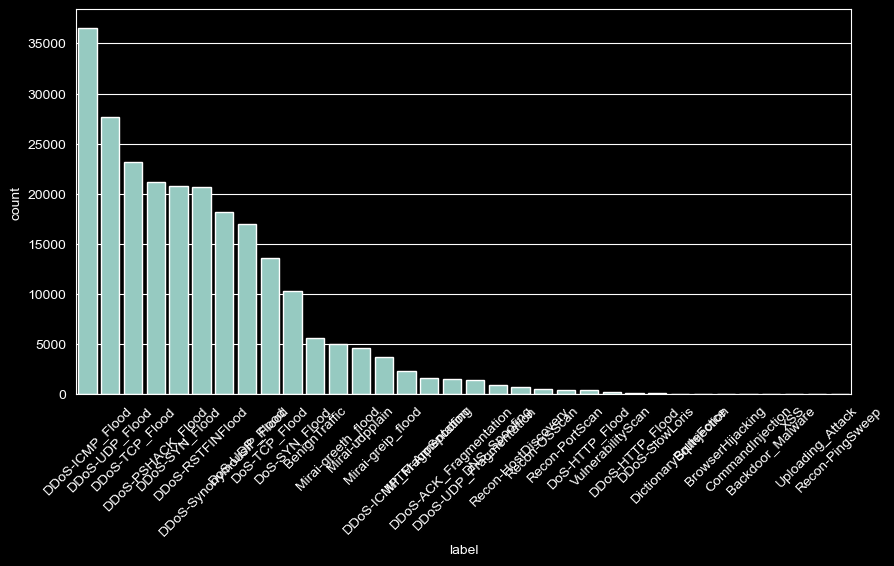

In [5]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='label', order=df['label'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

Большой дисбаланс классов... После слияния всех 4 .csv файлов нам стоит сделать ребаланс классов. Делать его по минимальному количеству нет смысла, так как в нашей выборке данных почти не будет. Над этой проблемой нужно будет подумать чуть позже.
Можно подумать над featuring engineering (создание новых признаков). Планирую оставить самые популярные атаки, а именно: ddos, dos, port scanning, brute force, spoofing.

There is a large class imbalance... After merging all 4 .csv files, we should rebalance the classes. There is no point in doing it with a minimum amount, since there will be almost no data in our sample. We'll need to think about this problem later.
You can think about featuring engineering (creating new features). I plan to leave the most popular attacks, namely ddos, dos, port scanning, brute force, spoofing.

Объединим 4 набора данных в один. upd: 10 сетов:)

Let's combine 4 data sets into one. upd: 10 sets:)

In [6]:
# читаем остальные файлы
df1 = pd.read_csv('part2.csv')
df2 = pd.read_csv('part3.csv')
df3 = pd.read_csv('part4.csv')
# -----  update  -----
df4 = pd.read_csv('part5.csv')
df5 = pd.read_csv('part6.csv')
df6 = pd.read_csv('part7.csv')
df7 = pd.read_csv('part8.csv')
df8 = pd.read_csv('part9.csv')
df9 = pd.read_csv('part10.csv')

dataframes = [df, df1, df2, df3, df4, df5, df6, df7, df8, df9]

combined_dataframe = pd.concat(dataframes).drop_duplicates().reset_index(drop=True)
combined_dataframe.to_csv('comb_dataframe.csv', index=False)
combined_dataframe['label'].value_counts()

label
DDoS-ICMP_Flood            367457
DDoS-UDP_Flood             276528
DDoS-TCP_Flood             230436
DDoS-PSHACK_Flood          209512
DDoS-SYN_Flood             207315
DDoS-RSTFINFlood           206422
DDoS-SynonymousIP_Flood    183409
DoS-UDP_Flood              170171
DoS-TCP_Flood              136206
DoS-SYN_Flood              102741
BenignTraffic               56314
Mirai-greeth_flood          50256
Mirai-udpplain              45626
Mirai-greip_flood           38426
DDoS-ICMP_Fragmentation     23074
MITM-ArpSpoofing            15714
DDoS-UDP_Fragmentation      14737
DDoS-ACK_Fragmentation      14592
DNS_Spoofing                 9183
Recon-HostDiscovery          6863
Recon-OSScan                 5108
Recon-PortScan               4221
DoS-HTTP_Flood               3702
VulnerabilityScan            1887
DDoS-HTTP_Flood              1450
DDoS-SlowLoris               1174
DictionaryBruteForce          675
BrowserHijacking              297
SqlInjection                  277
CommandI

Объединим атаки в общие группы, а именно: DDoS, DoS, Recon, Brute, Spoofing, Benign.  upd: сокращаем категории

Let's combine attacks into common groups, namely: DDoS, DoS, Recon, Brute, Spoofing, Benign.  upd: reducing categories

In [12]:
dff = pd.read_csv('comb_dataframe.csv')

category_mapping = {
    'DDoS-SYN_Flood': 'DDoS',
    'DDoS-ICMP_Flood': 'DDoS',
    'DDoS-UDP_Flood': 'DDoS',
    'DDoS-TCP_Flood': 'DDoS',

    'DoS-SYN_Flood': 'DoS',
    'DoS-TCP_Flood': 'DoS',
    'DoS-UDP_Flood': 'DoS',

    # ----- update -----
    # 'Recon-OSScan': 'Recon',
    # 'Recon-PortScan': 'Recon',
    # 'VulnerabilityScan': 'Recon',

    # 'DictionaryBruteForce': 'BruteForce',

    'MITM-ArpSpoofing': 'Spoofing',
    'DNS_Spoofing': 'Spoofing',

    'BenignTraffic': 'Benign'
}

dff['category'] = dff['label'].map(category_mapping)

dff['category'].value_counts()

category
DDoS        1081736
DoS          409118
Benign        56314
Spoofing      24897
Name: count, dtype: int64

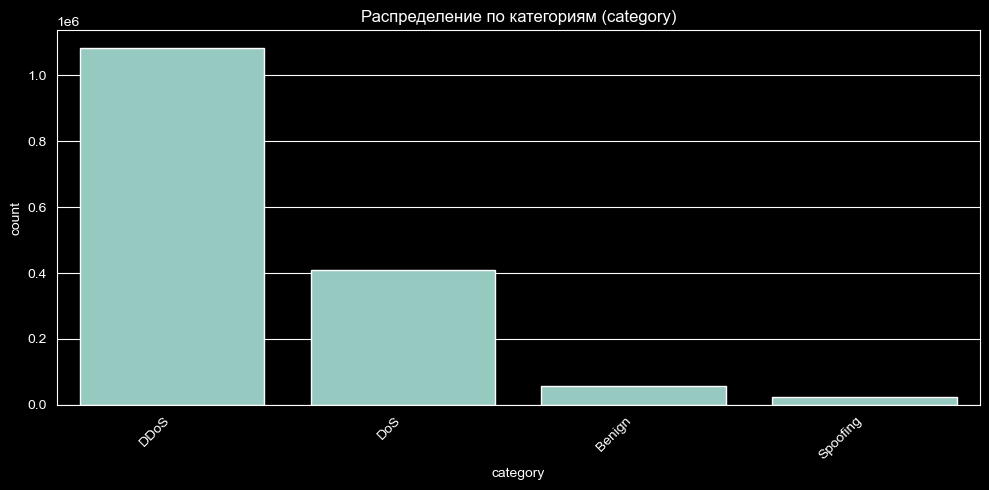

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(data=dff, x='category', order=dff['category'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title('Распределение по категориям (category)')
plt.tight_layout()
plt.show()

Очень большой дисбаланс классов... Есть два варианта решения проблема:
1) Упростить модель до классификации DDoS, DoS и Benign.
2) Взять еще данных из других .csv файлов, чтобы как-то разбавить имеющиеся.

There is a very large class imbalance... There are two possible solutions to the problem:
1) Simplify the model to classify DDoS, DoS, and Benign.
2) Take more data from other .csv files to somehow dilute the existing ones.

Возьму еще пару сетов, сделаю конкатинацию, добью +- 20к экземпляров в минимальном классе и сокращу количество классов в категориях.

I'll take a couple more sets, do concatination, get +- 20k copies in the minimum class, and reduce the number of classes in categories.

In [17]:
dff.dropna(subset=['category'], inplace=True)

dff.to_csv('comb_dataframe.csv', index=False)
dff.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label,category
1,0.000000,57.04,6.33,64.00,4.290556,4.290556,0.0,0.0,0.0,0.0,...,57.04,8.292607e+07,9.5,10.464666,4.010353,160.987842,0.05,141.55,DoS-TCP_Flood,DoS
2,0.000000,0.00,1.00,64.00,33.396799,33.396799,0.0,0.0,0.0,0.0,...,42.00,8.312799e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood,DDoS
3,0.328175,76175.00,17.00,64.00,4642.133010,4642.133010,0.0,0.0,0.0,0.0,...,50.00,8.301570e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DoS-UDP_Flood,DoS
4,0.117320,101.73,6.11,65.91,6.202211,6.202211,0.0,0.0,1.0,0.0,...,57.88,8.297300e+07,9.5,11.346876,32.716243,3016.808286,0.19,141.55,DoS-SYN_Flood,DoS
8,0.002135,192.52,16.89,65.73,16.883240,16.883240,0.0,0.0,0.0,0.0,...,180.72,8.300732e+07,9.5,18.809396,10.792987,328.325187,0.19,141.55,DoS-UDP_Flood,DoS


In [18]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1572065 entries, 1 to 2384554
Data columns (total 48 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   flow_duration    1572065 non-null  float64
 1   Header_Length    1572065 non-null  float64
 2   Protocol Type    1572065 non-null  float64
 3   Duration         1572065 non-null  float64
 4   Rate             1572065 non-null  float64
 5   Srate            1572065 non-null  float64
 6   Drate            1572065 non-null  float64
 7   fin_flag_number  1572065 non-null  float64
 8   syn_flag_number  1572065 non-null  float64
 9   rst_flag_number  1572065 non-null  float64
 10  psh_flag_number  1572065 non-null  float64
 11  ack_flag_number  1572065 non-null  float64
 12  ece_flag_number  1572065 non-null  float64
 13  cwr_flag_number  1572065 non-null  float64
 14  ack_count        1572065 non-null  float64
 15  syn_count        1572065 non-null  float64
 16  fin_count        157206

С помощью моей функции произведем ребаланс классов по самому минимальному.

Using my function, we will rebalance the classes according to the most minimal.

In [19]:
def balancing_by_min_class(csv_name, column_name, output_csv_name):
    csv_file = pd.read_csv(csv_name)
    min_class = csv_file[column_name].value_counts().min()

    balanced_samples = []

    for class_label in csv_file[column_name].unique():
        class_data = csv_file[csv_file[column_name] == class_label]

        sampled = class_data.sample(n=min_class, random_state=42)
        balanced_samples.append(sampled)

    balanced_df = pd.concat(balanced_samples)
    balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

    output_filename = output_csv_name
    balanced_df.to_csv(output_filename, index=False)

    return balanced_df

In [20]:
rebalance = balancing_by_min_class(csv_name='comb_dataframe.csv', column_name='category', output_csv_name='rebalanced_dataframe.csv')

In [21]:
balanced_df = pd.read_csv('rebalanced_dataframe.csv')
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99588 entries, 0 to 99587
Data columns (total 48 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   flow_duration    99588 non-null  float64
 1   Header_Length    99588 non-null  float64
 2   Protocol Type    99588 non-null  float64
 3   Duration         99588 non-null  float64
 4   Rate             99588 non-null  float64
 5   Srate            99588 non-null  float64
 6   Drate            99588 non-null  float64
 7   fin_flag_number  99588 non-null  float64
 8   syn_flag_number  99588 non-null  float64
 9   rst_flag_number  99588 non-null  float64
 10  psh_flag_number  99588 non-null  float64
 11  ack_flag_number  99588 non-null  float64
 12  ece_flag_number  99588 non-null  float64
 13  cwr_flag_number  99588 non-null  float64
 14  ack_count        99588 non-null  float64
 15  syn_count        99588 non-null  float64
 16  fin_count        99588 non-null  float64
 17  urg_count   

In [22]:
balanced_df['category'].value_counts()

category
Spoofing    24897
DoS         24897
DDoS        24897
Benign      24897
Name: count, dtype: int64

In [24]:
balanced_df.duplicated().sum()

np.int64(0)

Теперь избавлюсь от "label", так как сфокусирюсь на определении типа атаки, без конкретики.

Now I'll get rid of the "label", as I'll focus on determining the type of attack, without specifics.

In [34]:
balanced_df.drop('label', axis=1, inplace=True)
balanced_df.to_csv('final_data.csv', index=False)
balanced_df.tail()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,category
99583,0.007525,6975.0,17.0,64.0,18351.707641,18351.707641,0.0,0.0,0.0,0.0,...,0.000000,50.00,8.301647e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DoS
99584,57.393395,438766.1,9.3,82.3,37.842763,37.842763,0.0,0.0,0.0,0.0,...,219.842655,598.00,2.001410e-02,5.5,23.425681,310.904465,94650.677218,0.90,38.50,Benign
99585,27.720207,1418309.7,6.0,193.2,49.829870,49.829870,0.0,0.0,0.0,0.0,...,249.466664,351.70,3.989601e-03,5.5,19.586692,352.799139,103112.747129,0.90,38.50,Spoofing
99586,4.717887,113.5,6.0,64.0,0.436697,0.436697,0.0,0.0,1.0,0.0,...,0.654838,54.12,8.298535e+07,9.5,10.416341,0.926990,2.525671,0.18,141.55,DoS
99587,3.994253,108.0,6.0,64.0,0.500723,0.500723,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.295108e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DoS


На этом обработку завершаю, далее буду тестировать на catboost и lightgbm.

This completes the processing, then I will test on catboost and lightgbm.